In [1]:
from sklearn.cluster import KMeans

In [2]:
import matplotlib
import pandas as pd
import codecs
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [63]:
df = pd.read_csv('modular_1080903.csv',encoding ='big5')

In [64]:
plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文字體設置-黑體
plt.rcParams['axes.unicode_minus'] = False  # 解决保存圖像是負號'-'顯示為方快的問題
sns.set(font='SimHei')  # 解决Seaborn中文顯示問題

In [177]:
clf = KMeans(n_clusters=3)

In [178]:
pd.set_option('display.max_rows',300)#設置顯示列數
pd.set_option('display.max_columns',800)

In [238]:
df1 = df[["Modulus 40%_拉伸力 ( 拉力)L","Modulus 40%_拉伸力 ( 拉力)W"]]

In [239]:
df1 = df1.fillna(0)

In [240]:
b = df['彈性']

In [241]:
k_3_test = pd.concat([df1,b],ignore_index = True,axis=1)

In [242]:
k_3_test = k_3_test.drop(k_3_test.index[[10,18,20,21,22,23]])

In [243]:
k_3_test.columns = ['w','L','彈性']
k_3_test = k_3_test.reset_index(drop = True)

In [244]:
test = k_3_test[['w','L']]

In [245]:
clf.fit(test)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [246]:
a = clf.labels_
a = pd.DataFrame(a)

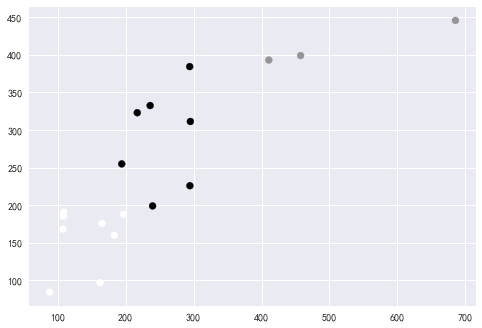

In [247]:
plt.scatter(k_3_test.iloc[:,0], k_3_test.iloc[:,1], c=clf.labels_)

In [248]:
k_3_test = pd.concat([k_3_test,a],ignore_index = True,axis=1)

In [249]:
k_3_test.columns = ['W','L','彈性','Category']

In [250]:
k_3_test

,W,L,彈性,Category
0,107.90,168.40,中彈,0
1,88.20,84.40,低彈,0
2,410.70,393.10,高彈,1
3,197.10,187.90,中彈,0
4,294.30,384.40,中彈,2
5,457.50,399.10,中彈,1
6,685.30,445.80,中彈,1
7,295.30,311.40,中彈,2
8,165.47,175.90,中彈,0
9,183.56,160.20,高彈,0


In [251]:
for i in range(len(k_3_test)):
    if k_3_test.loc[i,'Category']==0:
        k_3_test.loc[i,'Category']='低彈'
    elif k_3_test.loc[i,'Category']==1:
         k_3_test.loc[i,'Category']='高彈'
    elif k_3_test.loc[i,'Category']==2:
         k_3_test.loc[i,'Category']='中彈'

In [252]:
k_3_test

,W,L,彈性,Category
0,107.90,168.40,中彈,低彈
1,88.20,84.40,低彈,低彈
2,410.70,393.10,高彈,高彈
3,197.10,187.90,中彈,低彈
4,294.30,384.40,中彈,中彈
5,457.50,399.10,中彈,高彈
6,685.30,445.80,中彈,高彈
7,295.30,311.40,中彈,中彈
8,165.47,175.90,中彈,低彈
9,183.56,160.20,高彈,低彈


In [263]:
k_3_test.to_csv('kmean(3)_W,L.csv',encoding='big5')

In [253]:
clf_4 = KMeans(n_clusters=4)

In [254]:
test_4 = k_3_test[['W','L']]

In [255]:
clf_4.fit(test_4)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [256]:
a = clf_4.labels_
a = pd.DataFrame(a)

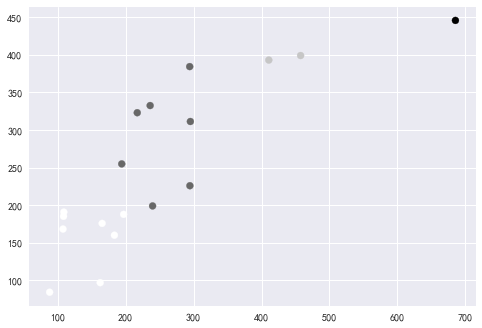

In [257]:
plt.scatter(test_4.iloc[:,0], test_4.iloc[:,1], c=clf_4.labels_)

In [258]:
k_4_test = k_3_test[['W','L','彈性']]
k_4_test = pd.concat([k_4_test,a],ignore_index = True,axis=1)

In [259]:
k_4_test.columns = ['W','L','彈性','Category']

In [260]:
k_4_test

,W,L,彈性,Category
0,107.90,168.40,中彈,0
1,88.20,84.40,低彈,0
2,410.70,393.10,高彈,1
3,197.10,187.90,中彈,0
4,294.30,384.40,中彈,2
5,457.50,399.10,中彈,1
6,685.30,445.80,中彈,3
7,295.30,311.40,中彈,2
8,165.47,175.90,中彈,0
9,183.56,160.20,高彈,0


In [261]:
for i in range(len(k_4_test)):
    if k_4_test.loc[i,'Category']==3:
        k_4_test.loc[i,'Category']='四級'
    elif k_4_test.loc[i,'Category']==1:
         k_4_test.loc[i,'Category']='三級'
    elif k_4_test.loc[i,'Category']==2:
         k_4_test.loc[i,'Category']='二級'
    elif k_4_test.loc[i,'Category']==0:
         k_4_test.loc[i,'Category']='ㄧ級'

In [262]:
k_4_test

,W,L,彈性,Category
0,107.90,168.40,中彈,ㄧ級
1,88.20,84.40,低彈,ㄧ級
2,410.70,393.10,高彈,三級
3,197.10,187.90,中彈,ㄧ級
4,294.30,384.40,中彈,二級
5,457.50,399.10,中彈,三級
6,685.30,445.80,中彈,四級
7,295.30,311.40,中彈,二級
8,165.47,175.90,中彈,ㄧ級
9,183.56,160.20,高彈,ㄧ級


In [264]:
k_4_test.to_csv('kmean(4)_W,L.csv',encoding='big5')

In [173]:
x = k_4_test[['W','L']]

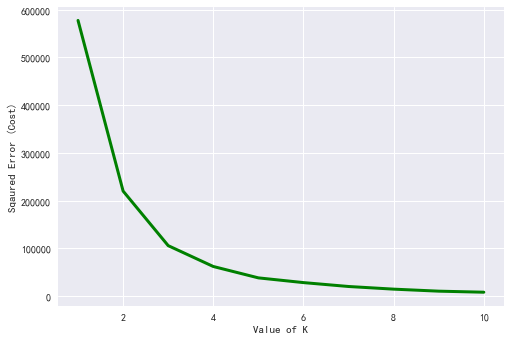

In [175]:
cost =[] 
for i in range(1, 11): 
    KM = KMeans(n_clusters = i, max_iter = 500) 
    KM.fit(x) 
      
    # calculates squared error 
    # for the clustered points 
    cost.append(KM.inertia_)      
  
# plot the cost against K values 
plt.plot(range(1, 11), cost, color ='g', linewidth ='3') 
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error (Cost)") 
plt.show() # clear the plot 